In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/psa_functional_genomics/RA_challenge/RA2_alpine_lads')

In [2]:
import pandas as pd
import numpy as np
import os
from utils.config import Config
test_config = Config()
from dataset.train_dataset import train_dataset

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from tensorflow import keras 

In [4]:
dataset = train_dataset(test_config)

In [5]:
hands_dataset,feet_dataset = dataset.initialize_pipeline()

In [6]:
feet_dataset

<PrefetchDataset shapes: ((None, 150, 105, 1), (None, 13)), types: (tf.float32, tf.int64)>

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(test_config.feet_height,test_config.feet_width ,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(13)
])

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 105, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 52, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 52, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14976)             0

In [11]:
history = model.fit(
    feet_dataset,epochs=10, steps_per_epoch=150
)

Train for 150 steps
Epoch 1/10
150/150 [==============================] - 4s 27ms/step - loss: 4.4525
Epoch 2/10
150/150 [==============================] - 1s 4ms/step - loss: 4.0219
Epoch 3/10
150/150 [==============================] - 1s 4ms/step - loss: 3.4216
Epoch 4/10
150/150 [==============================] - 1s 4ms/step - loss: 2.1768
Epoch 5/10
150/150 [==============================] - 1s 4ms/step - loss: 1.6891
Epoch 6/10
150/150 [==============================] - 1s 4ms/step - loss: 1.1505
Epoch 7/10
150/150 [==============================] - 1s 4ms/step - loss: 0.8647
Epoch 8/10
150/150 [==============================] - 1s 4ms/step - loss: 0.4990
Epoch 9/10
150/150 [==============================] - 1s 4ms/step - loss: 0.5573
Epoch 10/10
150/150 [==============================] - 1s 4ms/step - loss: 0.4154


In [12]:
model.predict(feet_dataset,steps = 10)

array([[-0.05821441, -0.05684605,  0.08079252, ..., -0.01835524,
        -0.05930293,  0.02286079],
       [ 0.01717665,  0.21000402,  1.0610219 , ..., -0.23055443,
        -0.2745688 ,  2.7868984 ],
       [-0.06707621,  0.1373533 ,  0.04193891, ...,  0.03036746,
        -0.11309013,  1.0864015 ],
       ...,
       [ 0.08857629,  0.01500486,  0.09133238, ..., -0.05616544,
        -0.02630796, -0.18074784],
       [-0.05733579,  0.45060918, -0.02243848, ..., -0.02979903,
        -0.05185947,  1.9897221 ],
       [ 0.03737185,  0.06135184,  0.00828129, ..., -0.29357925,
        -0.04781602,  0.11438655]], dtype=float32)

tf.Tensor([0 0 2 0 0 2 0 0 0 0 0 0 4], shape=(13,), dtype=int64)
[[-0.09188825 -0.63702196  2.2268462  -0.00572405 -0.2518939   1.5003246
  -0.0329048  -0.06097862  0.02916276 -0.29922485 -0.18209782  0.13210902
   3.78525   ]]
Image shape:  (16, 150, 105, 1)
Label:  [[ 0  0  2  0  0  2  0  0  0  0  0  0  4]
 [ 0  0  2  2  2  4  0  3  3  2  3  2 23]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  2]
 [ 3  3  4  4  4  4  3  2  4  4  4  4 43]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


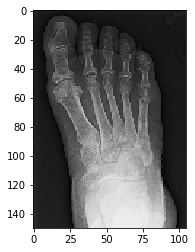

In [16]:
for image, label in feet_dataset.take(1):
    plt.imshow(np.repeat(np.array(image[0]),3,axis=2),cmap="Greys")
    print(label[0])
    print(model.predict(np.array(image[0]).reshape(1,150,105,1)))
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())